In [1]:
from drama_simulatorv2 import DramaSimulator, Genome
import csv
import os

In [ ]:
viruses = [
    "influenza",
    "lassa",
    "measles",
    "sars-cov-2",
    "rotavirus",
]

sequencers = [
    "illumina",
    "roche",
    "pacbio",
]

faulty_cells_list = [2 ** 23]
ets = [4, 5]

In [ ]:
# outfile = "results.csv"
# if not os.path.exists(outfile):
#     with open(outfile, "w") as f:
#         writer = csv.writer(f)
#         writer.writerow(["virus", "sequencer", "error tolerance", "faulty cells", "tp", "fp", "fn"])

In [7]:
drama = DramaSimulator(32, 0, 2 ** 13)

In [8]:
heatmap = drama.get_cells_heatmap(bank=0)

=> Started row 0
===> Finished row 0
=> Started row 1
===> Finished row 1
=> Started row 2
===> Finished row 2
=> Started row 3
===> Finished row 3
=> Started row 4
===> Finished row 4
=> Started row 5
===> Finished row 5
=> Started row 6
===> Finished row 6
=> Started row 7
===> Finished row 7
=> Started row 8
===> Finished row 8
=> Started row 9
===> Finished row 9
=> Started row 10
===> Finished row 10
=> Started row 11
===> Finished row 11
=> Started row 12
===> Finished row 12
=> Started row 13
===> Finished row 13
=> Started row 14
===> Finished row 14
=> Started row 15
===> Finished row 15
=> Started row 16
===> Finished row 16
=> Started row 17
===> Finished row 17
=> Started row 18
===> Finished row 18
=> Started row 19
===> Finished row 19
=> Started row 20
===> Finished row 20
=> Started row 21
===> Finished row 21
=> Started row 22
===> Finished row 22
=> Started row 23
===> Finished row 23
=> Started row 24
===> Finished row 24
=> Started row 25
===> Finished row 25
=> Sta

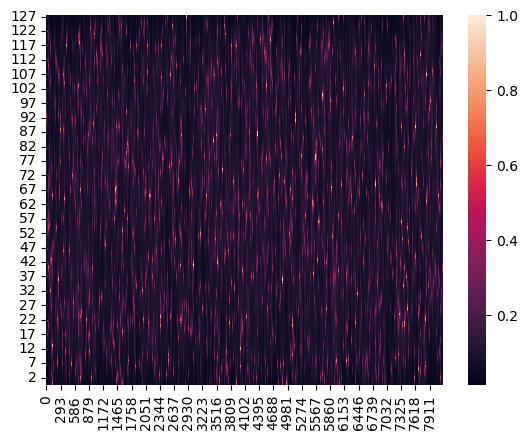

In [9]:
# plot a stylish heatmap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.DataFrame(heatmap.get())
df = df.iloc[::-1]
sns.heatmap(df)
plt.show()

In [ ]:
import csv

def get_rows_from_csv_file():
    rows = []
    with open("results.csv", "r") as f:
        reader = csv.reader(f)
        first_row = True
        for row in reader:
            if first_row:
                first_row = False
                order_to_idx = {}
                for i in range(len(row)):
                    order_to_idx[row[i]] = i
                continue
            rows.append(row)
    return rows, order_to_idx
rows, order_to_idx = get_rows_from_csv_file()

In [ ]:
order_to_idx

In [ ]:
def order_by(rows, order: int):
    dict = {}
    with open("results.csv", "r") as f:
        reader = csv.reader(f)
        first_row = True
        for row in rows:
            if row[order] not in dict:
                dict[row[order]] = [row]
            else:
                dict[row[order]].append(row)
        reordered_rows = []
        for key in dict:
            reordered_rows += dict[key]
    return reordered_rows

In [ ]:
rows = order_by(rows, order_to_idx["faulty cells"])

rows = order_by(rows, order_to_idx["virus"])
rows = order_by(rows, order_to_idx["error tolerance"])
rows = order_by(rows, order_to_idx["sequencer"])

In [ ]:
def calc_sensitivity(tp, fn):
    if tp + fn == 0:
        return 1
    return tp / (tp + fn)

def calc_specificity(tn, fp):
    if tn + fp == 0:
        return 0
    return tn / (tn + fp)

def calc_accuracy(tp, tn, fp, fn):
    if tp + tn + fp + fn == 0:
        return 0
    return (tp + tn) / (tp + tn + fp + fn)

def calc_precision(tp, fp):
    if tp + fp == 0:
        return 0
    return tp / (tp + fp)

def calc_f1_score(tp, fp, fn):
    if tp + fp + fn == 0:
        return 0
    return 2 * tp / (2 * tp + fp + fn)

In [ ]:
# write rows to csv file
with open("variable_fc.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerow(["virus", "sequencer", "error tolerance", "faulty cells", "tp", "fp", "fn", "sensitivity", "precision", "f1 score"])
    for row in rows:
        tp = int(row[-3])
        fp = int(row[-2])
        fn = int(row[-1])
        row.append(calc_sensitivity(tp, fn))
        row.append(calc_precision(tp, fp))
        row.append(calc_f1_score(tp, fp, fn))
        writer.writerow(row)